This notebook pertains to mathematical theory and synthetic data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Define problem

In [2]:
timeconst = 1
ratio = 0.25

transition = timeconst * np.asarray([[-(1-ratio), ratio], [(1-ratio), -ratio]])

x0 = np.asarray([0.9,0.1])

transition

array([[-0.75,  0.25],
       [ 0.75, -0.25]])

Simulation using small timesteps

array([ 0.25002939,  0.74997061])

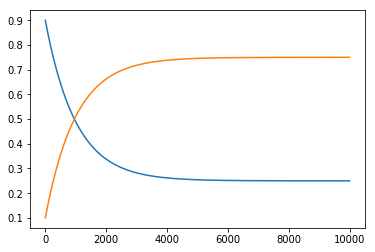

In [3]:
n = 10000
t = 10
series = np.empty((n,2))
series[0] = x0
for i in range(1,n):
    series[i] = series[i-1,:] + (t/n) * transition @ series[i-1,:]
plt.plot(series)
series[-1]

Exact solution

array([ 0.25002954,  0.74997046])

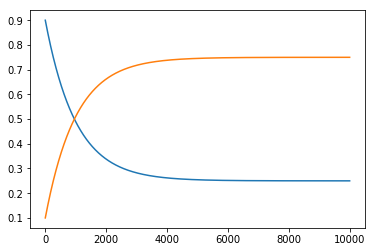

In [4]:
pi = np.asarray([ratio, 1-ratio])
assert np.all(transition @ pi == [0,0])
def m(t):
    return pi[:,None] - np.exp(-timeconst * t) * transition / timeconst
def p(t):
    return m(t) @ x0
series = np.empty((n,2))
for i in range(n):
    series[i] = p(i * t/n)
plt.plot(series)
series[-1]

In [5]:
m(0)

array([[ 1.,  0.],
       [ 0.,  1.]])

In [6]:
m(100)

array([[ 0.25,  0.25],
       [ 0.75,  0.75]])

The exact solution has a very simple form for the two-state case. Since the probabilities must sum to unity, the only valid region of the 2D state space is a straight line interval (from 100% one component to 100% the other component). The transition rate generator matrix must linearly map this subspace to itself and also tend towards a unique attractor; the dynamics must presumably be a stretch-shear. (Reflections/inversions are excluded by time-continuity.) For the three-state case, possible dynamics may include spirals? In general there may be no simple closed form solution; it may be necessary to compute the matrix exponential for each duration.

## Synthetic data

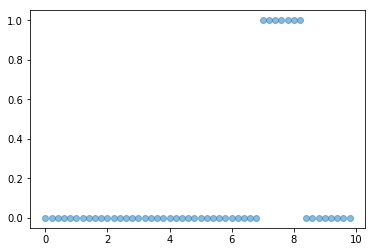

In [75]:
dt = timeconst / 5 # observation frequency
tobs = np.arange(0, t, dt) # observation times

import random
random.seed(0)
obs = np.empty_like(tobs, dtype=np.int8)
M = m(dt)
for i,to in enumerate(tobs):
    if i == 0:
        obs[i] = random.random() < ratio
    else:
        obs[i] = random.random() < M[0][1 - obs[i-1]]
plt.plot(tobs, obs, marker='o', linestyle='', alpha=0.5)

In [50]:
M

array([[ 0.92862806,  0.02379065],
       [ 0.07137194,  0.97620935]])

Note, if only using integer-multiple time steps for interpolation, m(t) is amenable to a lookup table.

In [31]:
int(obs[1-1])

0